[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zaidalyafeai/Notebooks/blob/master/Sketcher.ipynb)

# Get the Class names 

This file contains a subset of the quick draw classes. I choose around 100 classes from the dataset. 

Read the classes names 

In [1]:
f = open("categories.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [2]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

# Download the Dataset 

Loop over the classes and download the currospondent data

In [3]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'dataset/'+c+'.npy')

In [4]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/animal%20migration.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/arm.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/asparagus.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
https://storage.googleapis.com/quickd

# Imports 

In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import time

# Load the Data 

Each class contains different number samples of arrays stored as .npy format. Since we have some memory limitations we only load 5000 images per class.  

In [83]:
def load_data(root, vfold_ratio_test=0.2, vfold_ratio_val=0.1, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        #data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size_t = int(x.shape[0]/100*(vfold_ratio_test*100))
    vfold_size_v = int(x.shape[0]/100*((vfold_ratio_val+vfold_ratio_test)*100))

    x_test = x[0:vfold_size_t, :]
    y_test = y[0:vfold_size_t]
    
    x_val = x[vfold_size_t:vfold_size_v, :]
    y_val = y[vfold_size_t:vfold_size_v]

    x_train = x[vfold_size_v:x.shape[0], :]
    y_train = y[vfold_size_v:y.shape[0]]
    return x_train, y_train, x_test, y_test, x_val, y_val, class_names

In [122]:
def load_data_batch(root, vfold_ratio_test=0.2, vfold_ratio_val=0.1, file_batch_size = 2):
  
    # Get a list of all .npy files in the directory
    file_list = glob.glob(os.path.join(root, '*.npy'))
    print(file_list)
    
    # Create a TensorFlow dataset from the file list
    file_dataset = tf.data.Dataset.from_tensor_slices(file_list)
    print(file_dataset.cardinality().numpy())
    print(type(file_dataset.take(1)))
    
    # Define a function to load and process each file
    def load_and_process(file_path):
        data = np.load(file_path)
        # Perform any necessary processing on the data
        #data.reshape(data.shape[0], image_size, image_size, 1).astype('float32')
        #data /= 255.0
        return data

    # Map the file_dataset to the load_and_process function
    data_dataset = file_dataset.map(load_and_process)
    print(data_dataset.cardinality().numpy())
    
    # Concatenate the data_dataset into a single combined dataset
    combined_dataset = data_dataset.concatenate()
    print(combined_dataset.cardinality().numpy())

  
    
    #return x_train, y_train, x_test, y_test, x_val, y_val, class_names

In [147]:
file_list = ['dataset_test\\aircraft_carrier.npy', 'dataset_test\\airplane.npy', 'dataset_test\\alarm_clock.npy', 'dataset_test\\ambulance.npy', 'dataset_test\\angel.npy', 'dataset_test\\animal_migration.npy']
#file_dataset = tf.data.Dataset.from_tensor_slices(file_list)

## Define a function to load and process each file
#def load_and_process(file_path):
#    #print("file_path: ",bytes.decode(file_path.numpy()),type(bytes.decode(file_path.numpy())))
#    
#    data = np.load(bytes.decode(file_path.numpy()))
#    # Perform any necessary processing on the data
#    data.reshape(data.shape[0], image_size, image_size, 1).astype('float32')
#    data /= 255.0
#    return data
## Map the file_dataset to the load_and_process function
#data_dataset = file_dataset.map(lambda x: tf.py_function(load_and_process, [x], [tf.string]))
#print(data_dataset.cardinality().numpy())

#initialize variables 


file_list = glob.glob(os.path.join('dataset', '*.npy'))
class_names = []

#load each data file 
for idx, file in enumerate(file_list):
    x = np.empty([0, 784])
    y = np.empty([0])
    data = np.load(file)
    labels = np.full(data.shape[0], idx)
    x = np.concatenate((x, data), axis=0)
    y = np.append(y, labels)
    class_name, ext = os.path.splitext(os.path.basename(file))
    class_names.append(class_name)
    
    if(idx == 0):
        combined_dataset = tf.data.Dataset.from_tensor_slices((x, y))
        print(combined_dataset.cardinality().numpy())
    else:
        s_dataset = tf.data.Dataset.from_tensor_slices((x, y))
        combined_dataset = combined_dataset.concatenate(s_dataset)
        print(combined_dataset.cardinality().numpy())

print(combined_dataset.cardinality().numpy())

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [28]:
import tensorflow as tf
import numpy as np
import glob



# Define the function to load data from a single .npy file
def load_data(filename, idx):
    data = np.load(filename)
    data = data.reshape(data.shape[0], 28, 28, 1).astype('float32')
    data /= 255.0
    labels = np.full(data.shape[0], idx)
    return data, labels

# Define the generator function to yield data from multiple files
def data_generator(filenames):
    idx = 0
    for filename in filenames:
        print(filename, idx)
        data = load_data(filename, idx)
        idx += 1
        yield data

# Set the paths to the .npy files
file_paths = glob.glob(os.path.join('dataset', '*.npy'))

# Create a TensorFlow dataset using dataset.from_generator
dataset = tf.data.Dataset.from_generator(
    generator=lambda: data_generator(file_paths),
    output_types=(tf.float32,tf.int8)
    #output_signature=tf.TensorSpec(shape=(116504, 784), dtype=tf.float32)
)

dataset.shuffle(buffer_size=1000000)

c = 0
for data, labels in dataset:
    c += 1
    # Process the data
    print(data.shape, labels.shape)
    print(labels)
    #print(data[1])
    if c == 3:
        break

dataset\aircraft_carrier.npy 0
(116504, 28, 28, 1) (116504,)
tf.Tensor([0 0 0 ... 0 0 0], shape=(116504,), dtype=int8)
dataset\airplane.npy 1
(151623, 28, 28, 1) (151623,)
tf.Tensor([1 1 1 ... 1 1 1], shape=(151623,), dtype=int8)
dataset\alarm_clock.npy 2
(123399, 28, 28, 1) (123399,)
tf.Tensor([2 2 2 ... 2 2 2], shape=(123399,), dtype=int8)


In [8]:
#data = np.load('dataset\\aircraft_carrier.npy')
#print(data[0])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   5  16   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [123]:
image_size = 28
start = time.time()
#x_train, y_train, x_test, y_test, x_val, y_val, class_names = load_data('dataset')
load_data_batch('dataset_test')
end = time.time()
print('Load np data time: {}(s)'.format(end - start))



#num_classes = len(class_names)
#print("Total Classes: {}.".format(num_classes))
#print("The number of train data: {}. test data: {}. validation data: {}.".format(len(x_train), len(x_test), len(x_val)))

['dataset_test\\aircraft_carrier.npy', 'dataset_test\\airplane.npy', 'dataset_test\\alarm_clock.npy', 'dataset_test\\ambulance.npy', 'dataset_test\\angel.npy', 'dataset_test\\animal_migration.npy']
6
<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>


TypeError: in user code:

    File "C:\Users\USER\AppData\Local\Temp\ipykernel_11132\711908681.py", line 14, in load_and_process  *
        data = np.load(file_path)
    File "C:\ProgramData\anaconda3\envs\NuEdgeWise_env\lib\site-packages\numpy\lib\npyio.py", line 407, in load  **
        fid = stack.enter_context(open(os_fspath(file), "rb"))

    TypeError: expected str, bytes or os.PathLike object, not Tensor


Show some random data 

zebra


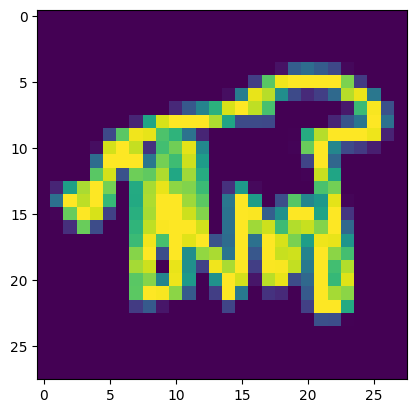

In [49]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [50]:
print(int(y_train[idx].item()))
print(class_names[int(y_train[idx].item())])

343
zebra


In [104]:
import tensorflow as tf

# Create the original dataset
dataset = tf.data.Dataset.range(1, 11)  # Dataset with elements [1, 2, 3, ..., 10]

# Shuffle the dataset
shuffled_dataset = dataset.shuffle(buffer_size=10, reshuffle_each_iteration=False)

# Calculate the split sizes
total_size = 10
train_size = int(0.8 * total_size)  # 80% of the data for training
test_size = total_size - train_size  # Remaining 20% for testing

# Convert the shuffled dataset into an iterator
iterator = iter(shuffled_dataset)

# Split the dataset
train_dataset = tf.data.Dataset.from_generator(lambda: iterator, tf.int64).take(train_size)
test_dataset = tf.data.Dataset.from_generator(lambda: iterator, tf.int64).take(test_size)

# Print the elements in each dataset
print("Training Dataset:")
for element in train_dataset:
    print(element.numpy())  # Print the values

print("\nTesting Dataset:")
for element in test_dataset:
    print(element.numpy())  # Print the values

Training Dataset:
1
5
8
4
3
2
9
10

Testing Dataset:
6
7


In [108]:
import tensorflow as tf

# Create the original dataset
dataset = tf.data.Dataset.range(1, 11)  # Dataset with elements [1, 2, 3, ..., 10]

# Shuffle the dataset
shuffled_dataset = dataset.shuffle(buffer_size=10, reshuffle_each_iteration=False)

# Calculate the split sizes
total_size = 10
train_size = int(0.8 * total_size)  # 80% of the data for training
test_size = total_size - train_size  # Remaining 20% for testing

# Split the dataset
train_dataset = shuffled_dataset.take(train_size)
test_dataset = shuffled_dataset.skip(train_size).take(test_size)

# Print the elements in each dataset
print("Training Dataset:")
for element in train_dataset:
    print(element.numpy())  # Print the values

print("\nTesting Dataset:")
for element in test_dataset:
    print(element.numpy())  # Print the values

Training Dataset:
6
7
9
5
3
4
10
1

Testing Dataset:
2
8


# Preprocess the Data 

In [77]:
# Get the train data length
len_train_data = x_train.shape[0]
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')
x_val = x_val.reshape(x_val.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0
x_val /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [78]:
print(x_train.shape, y_train.shape)

(96600, 28, 28, 1) (96600, 345)


Convert to TF dataset

In [79]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len_train_data).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

# The Model 

In [80]:
LEARNING_RATE = 0.0001
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(num_classes, activation='softmax')) 
# Train model
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 3, 3, 64)        

# Training 

In [81]:
checkpoint_path = "workspace/345_test"
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=1)

#model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)
model.fit(train_dataset, validation_data=val_dataset, epochs=10, callbacks=[cp_callback])

Epoch 1/10
378/378 [==============================] - ETA: 0s - loss: 4.5299 - top_k_categorical_accuracy: 0.3002
Epoch 1: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 9s 7ms/step - loss: 4.5299 - top_k_categorical_accuracy: 0.3002 - val_loss: 3.7932 - val_top_k_categorical_accuracy: 0.4712
Epoch 2/10
371/378 [============================>.] - ETA: 0s - loss: 3.4289 - top_k_categorical_accuracy: 0.5465
Epoch 2: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 3.4246 - top_k_categorical_accuracy: 0.5474 - val_loss: 3.1984 - val_top_k_categorical_accuracy: 0.5904
Epoch 3/10
364/378 [===========================>..] - ETA: 0s - loss: 2.9868 - top_k_categorical_accuracy: 0.6279
Epoch 3: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.9814 - top_k_categorical_accuracy: 0.6290 - val_loss: 2.9160 - val_top_k_categorical_accuracy: 0.6386
Epoch 4/10
364/378 [===========================>..] - ETA: 0s - loss: 2.7203 - top_k_categorical_accuracy: 0.6764
Epoch 4: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.7188 - top_k_categorical_accuracy: 0.6767 - val_loss: 2.7311 - val_top_k_categorical_accuracy: 0.6736
Epoch 5/10
367/378 [============================>.] - ETA: 0s - loss: 2.5328 - top_k_categorical_accuracy: 0.7080
Epoch 5: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.5317 - top_k_categorical_accuracy: 0.7081 - val_loss: 2.6011 - val_top_k_categorical_accuracy: 0.6962
Epoch 6/10
365/378 [===========================>..] - ETA: 0s - loss: 2.3940 - top_k_categorical_accuracy: 0.7300
Epoch 6: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.3934 - top_k_categorical_accuracy: 0.7299 - val_loss: 2.5168 - val_top_k_categorical_accuracy: 0.7091
Epoch 7/10
376/378 [============================>.] - ETA: 0s - loss: 2.2829 - top_k_categorical_accuracy: 0.7476
Epoch 7: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.2821 - top_k_categorical_accuracy: 0.7477 - val_loss: 2.4512 - val_top_k_categorical_accuracy: 0.7201
Epoch 8/10
376/378 [============================>.] - ETA: 0s - loss: 2.1937 - top_k_categorical_accuracy: 0.7621
Epoch 8: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.1933 - top_k_categorical_accuracy: 0.7622 - val_loss: 2.3961 - val_top_k_categorical_accuracy: 0.7279
Epoch 9/10
372/378 [============================>.] - ETA: 0s - loss: 2.1114 - top_k_categorical_accuracy: 0.7748
Epoch 9: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.1113 - top_k_categorical_accuracy: 0.7749 - val_loss: 2.3672 - val_top_k_categorical_accuracy: 0.7319
Epoch 10/10
365/378 [===========================>..] - ETA: 0s - loss: 2.0434 - top_k_categorical_accuracy: 0.7850
Epoch 10: saving model to workspace\345_test


INFO:tensorflow:Assets written to: workspace\345_test\assets


INFO:tensorflow:Assets written to: workspace\345_test\assets


378/378 [==============================] - 2s 5ms/step - loss: 2.0462 - top_k_categorical_accuracy: 0.7846 - val_loss: 2.3529 - val_top_k_categorical_accuracy: 0.7367


# Testing 

In [82]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 73.63%


# Inference 

['alarm_clock', 'bread', 't-shirt', 'butterfly', 'bird']


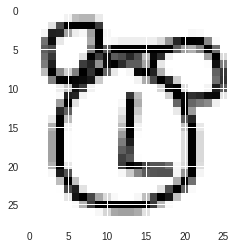

In [8]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

# Store the classes 

In [ ]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# Install TensorFlowJS

In [10]:
!pip install tensorflowjs 

    100% |████████████████████████████████| 327kB 6.4MB/s 
    100% |████████████████████████████████| 12.2MB 3.5MB/s 
  Found existing installation: numpy 1.14.3
    Uninstalling numpy-1.14.3:
      Successfully uninstalled numpy-1.14.3
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


# Save and Convert 

In [ ]:
model.save('keras.h5')

In [13]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

mkdir: cannot create directory ‘model’: File exists
/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Zip and Download 

In [ ]:
!cp class_names.txt model/class_names.txt

In [15]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group5-shard1of1 (deflated 7%)
  adding: model/model.json (deflated 82%)
  adding: model/group2-shard1of1 (deflated 7%)
  adding: model/group3-shard1of1 (deflated 7%)
  adding: model/class_names.txt (deflated 41%)
  adding: model/group1-shard1of1 (stored 0%)
  adding: model/group4-shard1of1 (deflated 7%)


In [ ]:
from google.colab import files
files.download('model.zip')